# **Face Recognition Using Eigenfaces**

In [84]:
import os
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error as euc_dist

## **Load data and Face Extraction**

In [85]:
#Uploaded the image dataset folder 📂 on the google drive and then fetched it using os
dataset = os.listdir('/content/Dataset')

# Using haar_face cascade classifier to extract faces in the images
haar_cascade = cv.CascadeClassifier('/content/haar_face.xml')

# load the image and convert into numpy array
img_array = [] 

for i in range(len(dataset)):
  # Applying try and except in case the faces are not present in the images
  try:
    img = cv.imread(f'/content/Dataset/{dataset[i]}')

  # Convert the image to grayscale to reduce the data size by reducing image to one channel only
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    faces_rect = haar_cascade.detectMultiScale(img,scaleFactor=1.125, minNeighbors=1,minSize=(30,30))
    a= faces_rect[0][0]
    b= faces_rect[0][1]
    c= faces_rect[0][2]
    d= faces_rect[0][3]
    img = img[b:b+d,a:a+c]
    img = cv.resize(img, (65, 65))
    img = np.array(img).flatten()
    img_array.append(img)
  except:
    continue
  
# print(img_array)

In [86]:
#Converting each image matrix in the dataset array into 1D(or a signle column matrix)
faces_mat = np.vstack(img_array)
img_array = np.array(img_array)

# Calculating the mean face matrix
mean_face_mat = np.mean(faces_mat, axis=0)
# mean_face_mat.shape

print(faces_mat.shape)

(450, 4225)


## **Getting Mean Face**

(450, 4225)

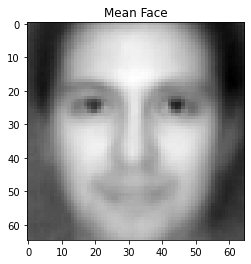

In [46]:
# Converting the column matrix back into a 2D matrix
reshaped_mean_face = mean_face_mat.reshape(65,65)

plt.imshow(reshaped_mean_face, cmap='gray'); 
plt.title('Mean Face')

# normalization
faces_norm = faces_mat - mean_face_mat
faces_norm.shape

## **Covariance Matrix**

In [50]:
# Calculating covariance matrix using inbuilt function
Covar_face = np.cov(faces_norm.T) #np.cov returns features as rows and observations as columns, 
Covar_face.shape
print(Covar_face)

[[4094.56186587 3741.99554566 3448.16619649 ... 1226.50841376
  1359.15486266 1217.1722346 ]
 [3741.99554566 4163.82628062 3755.66993318 ... 1114.95991091
  1266.96080178 1150.5077951 ]
 [3448.16619649 3755.66993318 4092.65144271 ... 1088.8196486
  1204.99916852 1137.62286563]
 ...
 [1226.50841376 1114.95991091 1088.8196486  ... 4054.29905964
  3829.12858203 3559.26354863]
 [1359.15486266 1266.96080178 1204.99916852 ... 3829.12858203
  4165.70886414 3878.3830735 ]
 [1217.1722346  1150.5077951  1137.62286563 ... 3559.26354863
  3878.3830735  4172.32516704]]


## **Applying SVD for obtaining eigenvector**


In [51]:
# Single Value Decomposition
eigen_vecs, eigen_vals, _ = np.linalg.svd(Covar_face)
eigen_vecs.shape
print(eigen_vecs)

[[-0.00564713 -0.02393238 -0.01107651 ...  0.01189624 -0.01137634
  -0.1270556 ]
 [-0.00631611 -0.02565108 -0.00784338 ... -0.04091285 -0.00270293
  -0.00573762]
 [-0.00648576 -0.02686189 -0.00546737 ... -0.17631697 -0.10517266
  -0.15645697]
 ...
 [-0.00756096 -0.02214947  0.00452536 ...  0.0124643   0.00046054
  -0.0055304 ]
 [-0.00715411 -0.02362261  0.00320858 ...  0.00954231  0.0183164
   0.00396693]
 [-0.00738172 -0.02339895  0.00442752 ... -0.01912861  0.02123275
  -0.0053777 ]]


## **Observing Eigenfaces**

Text(0.5, 0.98, 'First 16 Eigenfaces')

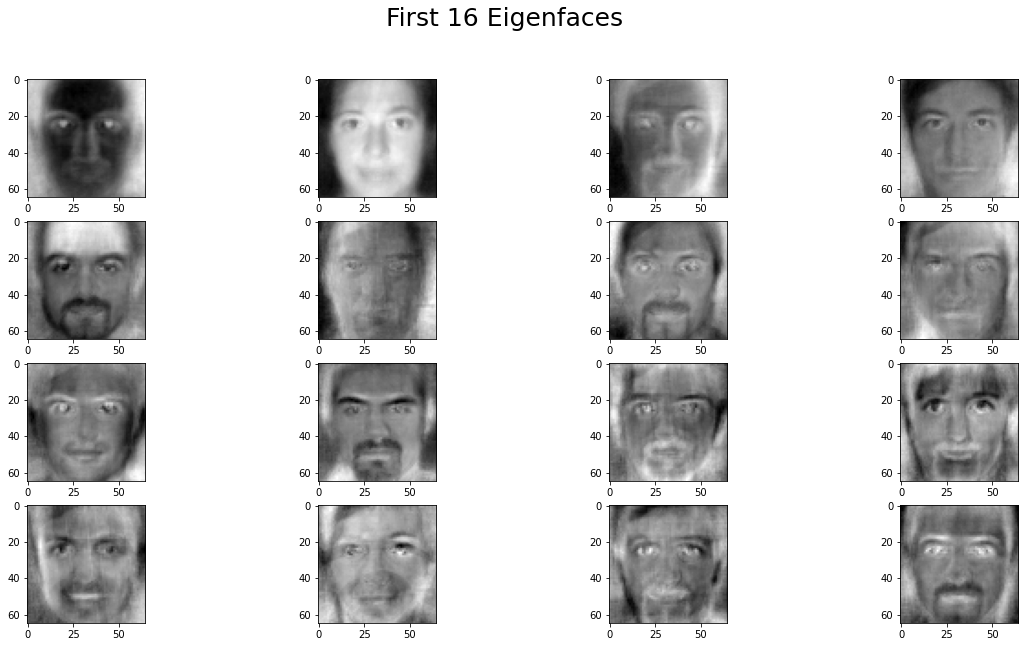

In [83]:
# Observing first few eigenfaces of the dataset, also known as ghostly images
figure, axis = plt.subplots(1,3,figsize=(20,10))
no_of_ef = 16
for i in range(no_of_ef):
    axis = plt.subplot(4,4,i+1)
    img = eigen_vecs[:,i].reshape(65,65)
    plt.imshow(img, cmap='gray')
figure.suptitle(f'First {no_of_ef} Eigenfaces', fontsize=25)

## **Reconstruction of Image**

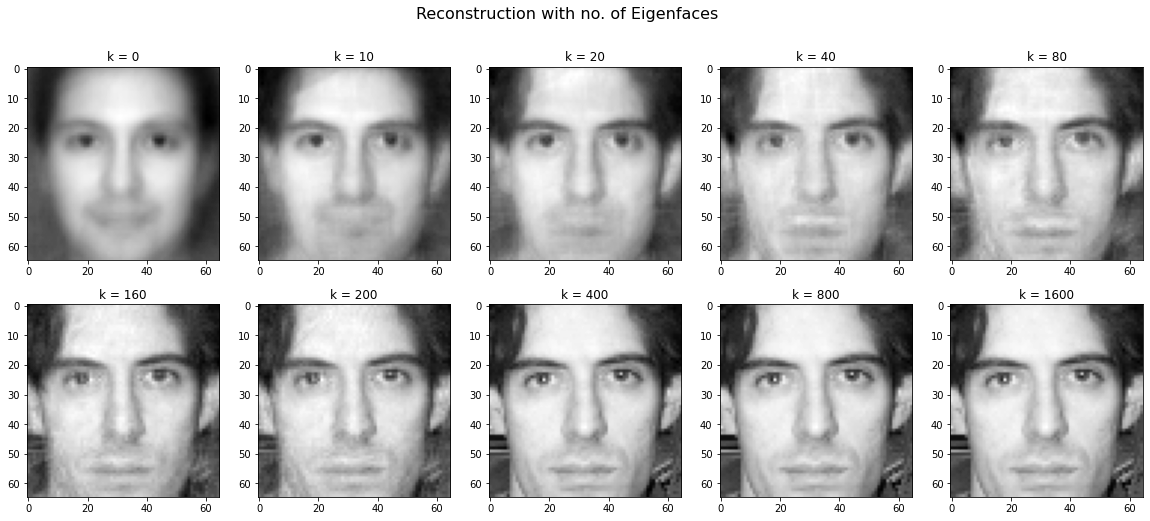

In [54]:
# Image Reconstruct of a face in dataset using different eigenfaces
figure, axis = plt.subplots(2,5,figsize=(20,8))
for k, i in zip([0,10,20,40,80,160,200,400,800,1600],range(10)):
    # Reconstruct the first picture '1a.jpg' whose index is 0.
    weight = faces_norm[75,:].dot(eigen_vecs[:,:k]) # Get PC scores of the images
    projected_face = weight.dot(eigen_vecs[:,:k].T) 
    axis = plt.subplot(2,5,i+1)
    axis.set_title("k = "+str(k))
    plt.imshow(projected_face.reshape(65,65)+mean_face_mat.reshape(65,65),cmap='gray');
figure.suptitle(("Reconstruction with no. of Eigenfaces"), fontsize=16);

## **Uploading Test Image**

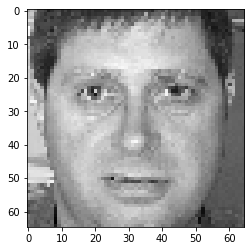

In [95]:
def get_imgtest(path):
    image_size = 65
    test = cv.imread(path)
    test = cv.cvtColor(test, cv.COLOR_BGR2GRAY)
    rect = haar_cascade.detectMultiScale(test,scaleFactor=1.125, minNeighbors=1,minSize=(30,30))
    a = rect[0][0]
    b = rect[0][1]
    c = rect[0][2]
    d = rect[0][3]
    img = test[b:b+d,a:a+c]
    img = cv.resize(img, (image_size, image_size))
    return img

# test = get_imgtest('/content/photo.jpg')
test = get_imgtest('/content/Dataset/image_0001.jpg')
plt.imshow(test, cmap = 'gray')

## **Finding Match**

In [90]:
def findingmatch(test_img,dataset):
  arr = []
  for i in range(450):
    weight = faces_norm[i,:].dot(eigen_vecs[:,:800]) 
    projected_face = weight.dot(eigen_vecs[:,:800].T) 
    data_img = projected_face.reshape(65,65)+mean_face_mat.reshape(65,65)
    
    ed = euc_dist(test,data_img) # Measuring the eucleadian distance
    # Applying threshold
    if(ed < 1500):
      # print(mse)
      arr.append(data_img)
      
  if(len(arr)==0):
    print("No Match Found")
  else:
    print("No. of faces matched: ",len(arr))
  return arr

No. of faces matched:  7


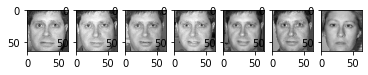

In [96]:

matched_img = findingmatch(test,img_array)
n = len(matched_img)
for i in np.arange(n):
  axis  = plt.subplot(1,n,i+1)
  img = matched_img[i]
  plt.imshow(img, cmap = 'gray')
